#Import Libraries

In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score


Using TensorFlow backend.


#Importing Dataset For the task completion

In [0]:
dataset =pd.read_csv("musk.csv")

In [3]:
dataset.shape

(6598, 170)

Removing the unsuited features from the dataset

In [0]:
del dataset['conformation_name']
del dataset['ID']

Checking for the Null Values and removing if any

In [5]:
dataset.isnull().sum()

molecule_name    0
f1               0
f2               0
f3               0
f4               0
                ..
f163             0
f164             0
f165             0
f166             0
class            0
Length: 168, dtype: int64

Overview of the dataset 

In [6]:
dataset.head(4)

,molecule_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,MUSK-211,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,MUSK-211,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,MUSK-211,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,MUSK-211,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1


Label and Features splitting from the dataset

In [0]:
label =dataset.iloc[:,-1:].values
data =dataset.iloc[:,:-1].values

##Preprocessing the dataset

* Applying LabelEncoding on the dataset
* Applying L2 normalization on dataset
* Train Test split in ratio of 80/20

In [0]:
data[:,0:1] =preprocessing.OrdinalEncoder().fit_transform(data[:,0:1])

In [0]:
data[:,1:] = preprocessing.normalize(data[:,1:], norm='l2')

In [0]:
train_X, test_X, train_y, test_y =model_selection.train_test_split(data, label, train_size=0.8) 

In [0]:
"""from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
train_X = sc_x.fit_transform(train_X)
test_X = sc_x.transform(test_X)"""

#Defining the Model

In [13]:
classifier =tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu', input_dim=167),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               43008     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               6

In [15]:
classifier.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
history =classifier.fit(train_X, train_y, batch_size = 128, epochs = 50, verbose = 1, validation_data = (test_X, test_y))

Train on 5278 samples, validate on 1320 samples
Epoch 1/50
5278/5278 [==============================] - 1s 156us/sample - loss: 0.4193 - acc: 0.8302 - val_loss: 0.2798 - val_acc: 0.9152
Epoch 2/50
5278/5278 [==============================] - 0s 49us/sample - loss: 0.2298 - acc: 0.8930 - val_loss: 0.3237 - val_acc: 0.9341
Epoch 3/50
5278/5278 [==============================] - 0s 49us/sample - loss: 0.2126 - acc: 0.9197 - val_loss: 0.3643 - val_acc: 0.9667
Epoch 4/50
5278/5278 [==============================] - 0s 51us/sample - loss: 0.1852 - acc: 0.9371 - val_loss: 0.3151 - val_acc: 0.9795
Epoch 5/50
5278/5278 [==============================] - 0s 47us/sample - loss: 0.1585 - acc: 0.9505 - val_loss: 0.2155 - val_acc: 0.9818
Epoch 6/50
5278/5278 [==============================] - 0s 47us/sample - loss: 0.1220 - acc: 0.9625 - val_loss: 0.1146 - val_acc: 0.9924
Epoch 7/50
5278/5278 [==============================] - 0s 47us/sample - loss: 0.0811 - acc: 0.9731 - val_loss: 0.0498 - val_acc:

#Visualising of the Training and Validation loss as well as accuracy

Text(0.5, 1.0, 'Training and validation loss')

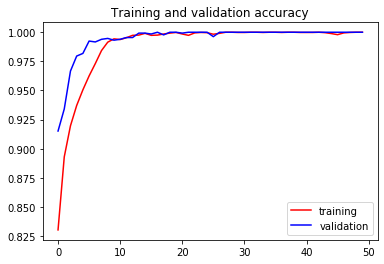

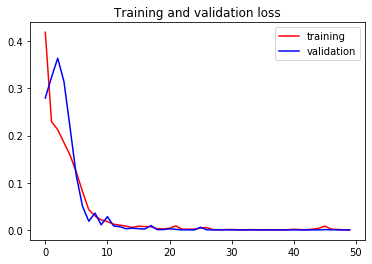

In [17]:
# sets for each training epoch
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch

plt.plot  ( epochs,     acc , color='red'  ,label="training")
plt.plot  ( epochs, val_acc , color='blue' ,label="validation")
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss per epoch

plt.plot  ( epochs,     loss ,color='red'  ,label="training")
plt.plot  ( epochs, val_loss ,color='blue' ,label="validation")
plt.legend()
plt.title ('Training and validation loss'   )

#Prediction results on the Validation Split and Analysis
* Accuracy 
* Precision
* Recall
* F1

In [0]:
result =classifier.predict(test_X)
result =(result>0.5)

In [23]:
cm =confusion_matrix(test_y ,result)
cm

array([[1115,    0],
       [   0,  205]])

In [0]:
accuracy =accuracy_score(test_y,result)
precision = cm[1][1]/(cm[1][1] + cm[0][1])
Recall = cm[1][1]/(cm[1][1] + cm[1][0])
f1 = (2*precision*Recall)/(precision+Recall)

In [27]:
print("Accuracy of model",accuracy)
print("Precision of model",precision)
print("Recall of model",Recall)
print("F1 score of model",f1)

Accuracy of model 1.0
Precision of model 1.0
Recall of model 1.0
F1 score of model 1.0


#saving of model bias

In [0]:
classifier.save_weights('classifier_weights.h5')